# Подключение необходимых библиотек

In [1]:
import os
import shutil
import gc
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from tqdm import tqdm
from torchvision import datasets, models, transforms
from torch.nn import functional as F
import torchinfo
from torchmetrics.classification import F1Score
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Устройство для обучения
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])

# data_transforms = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#         normalize
#     ])

# data = datasets.ImageFolder(root='./simpsons_dataset', transform=data_transforms)
# data_test = datasets.ImageFolder(root='./kaggle_simpson_testset', transform=data_transforms)
# generator = torch.Generator().manual_seed(42)
# data_train, data_valid = torch.utils.data.random_split(data, [0.9, 0.1], generator=generator)
# data_image = {
#     'train':
#         data_train,
#     'validation':
#         data_valid,
#     'test':
#         data_test
# }
# classes_image = list(data.class_to_idx.keys())
# loaders_image = {
#     'train':
#         torch.utils.data.DataLoader(data_image['train'], batch_size=32, shuffle=True),
#     'validation':
#         torch.utils.data.DataLoader(data_image['validation'], batch_size=32, shuffle=True),
#     'test':
#         torch.utils.data.DataLoader(data_image['test'], batch_size=32, shuffle=True)
# }
# # path_for_test = 'archive-2/kaggle_simpson_testset/kaggle_simpson_testset'
# # names = []
# # for dirs, folder, files in os.walk(path_for_test):
# #     for img in files:
# #         ind = '_'.join(os.path.splitext(os.path.basename(path_for_test + '/' + img))[0].split('_')[:-1])
# #         names.append(ind)
# # names = list(set(names))
# # print(len(names))
# # folder_path = './archive-2'
# # os.mkdir(folder_path+'/test')
# # folder_path = folder_path + '/test'
# # for folder in names:
# #     if not os.path.exists(folder_path + '/' + folder):
# #         os.mkdir(folder_path + '/' + folder)
# # list_of_names = os.listdir(folder_path)
# # print(list_of_names)
# # for dirs, folder, files in os.walk(path_for_test):
# #     for img in files:
# #         ind = '_'.join(os.path.splitext(os.path.basename(path_for_test + '/' + img))[0].split('_')[:-1])
# #         for name in list_of_names:
# #             if ind == name:
# #                 shutil.move(path_for_test + '/' + img, folder_path + '/' + name)

# def image_shower(images, labels, n=4):

#     fig, axes = plt.subplots(1, 4)
#     fig.set_figwidth(12)  # ширина и
#     fig.set_figheight(6)
#     for i, image in enumerate(images[:n]):
#         # plt.subplot(n, n, i + 1)
#         image = image * 0.2 + 0.4
#         axes[i].imshow(image.numpy().transpose((1, 2, 0)).squeeze())
#         axes[i].set_title(classes_image[labels[i]])

#         # plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
#     plt.show()
#     print("Real Labels: ", ' '.join('%5s' % classes_image[label] for label in labels[:n]))

# images, labels = next(iter(loaders_image['train']))

# # image_shower('train', images, labels)
# image_shower( images, labels)
# # data_test = datasets.ImageFolder(root ='/content/dataset/archive-2/kaggle_simpson_testset',
# #                                          transform = data_transforms)
# # print(data_test)
# # loaders_test = torch.utils.data.DataLoader(data_test, batch_size=32, shuffle=True, num_workers=0)
# # print(loaders_test)
# # names_train = []
# # for i, (images, labels) in enumerate(data_train):
# #   names_train.append(labels)
# # print(names_train)

# model = models.resnet50(pretrained=True)

# for param in model.parameters():
#     param.requires_grad = False

# model.fc = nn.Sequential(
#     nn.Linear(2048, 128),
#     nn.ReLU(inplace=True),
#     nn.Linear(128, 42))

# model.to(device)
# # img = torch.from_numpy(np.zeros((3, 224, 224))).float()
# # # Step 3: Apply inference preprocessing transforms
# # batch = preprocess(img).unsqueeze(0)

# # # Step 4: Use the model and print the predicted category
# # prediction = model(batch).squeeze(0).softmax(0)
# # print(prediction)
# # print(prediction.shape)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.fc.parameters())


# def train_model(model, criterion, optimizer, num_epochs=3):
#     for epoch in range(num_epochs):
#         print('Epoch {}/{}'.format(epoch+1, num_epochs))
#         print('-' * 10)

#         for phase in ['train', 'validation']:
#             if phase == 'train':
#                 model.train()
#             else:
#                 model.eval()

#             running_loss = 0.0
#             running_corrects = 0

#             for inputs, labels in loaders_image[phase]:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)

#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels)

#                 if phase == 'train':
#                     optimizer.zero_grad()
#                     loss.backward()
#                     optimizer.step()

#                 _, preds = torch.max(outputs, 1)
#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds == labels.data)

#             epoch_loss = running_loss / len(data_image[phase])
#             epoch_acc = running_corrects.double() / len(data_image[phase])

#             print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
#                                                         epoch_loss,
#                                                         epoch_acc))
#     return model
# def predict(model):
#     outputs = model(data_image['test'])
#     _, preds = torch.max(outputs, 1)
#     return preds

# def to_names(y):
#     result = []
#     for i in y:
#       result.append(classes_image['test'][i])
#       return result
# train_model(model, criterion, optimizer)
# #посчитаем точность работы нашего классификатора
# correct = 0
# total = 0
# with torch.no_grad():
#     model.eval()
#     for inputs, labels in loaders_image['test']:
#         inputs = inputs.to(device)
#         labels = labels.to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         for i, name in enumerate(predicted):
#             if classes_image['train'][name] == classes_image['test'][labels[i]]:
#                 correct += 1
#         # correct += (predicted == labels).sum().item()

#         del inputs, labels, outputs
#         torch.cuda.empty_cache()
#         gc.collect()
        
# print("Accuracy: %.4f" %(100 * correct/total))

# Считывание данных

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Устройство для обучения
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        normalize
    ])

data = datasets.ImageFolder(root='./archive-2/simpsons_dataset', transform=data_transforms)
data_test = datasets.ImageFolder(root='./archive-2/test', transform=data_transforms)
generator = torch.Generator().manual_seed(42)
data_train, data_valid = torch.utils.data.random_split(data, [0.9, 0.1], generator=generator)
data_image = {
    'train':
        data_train,
    'validation':
        data_valid,
    'test':
        data_test
}

classes_image = {
    'train':
        list(data.class_to_idx.keys()),
    'test':
        list(data_test.class_to_idx.keys())
}

loaders_image = {
    'train':
        torch.utils.data.DataLoader(data_image['train'], batch_size=32, shuffle=True),
    'validation':
        torch.utils.data.DataLoader(data_image['validation'], batch_size=32, shuffle=True),
    'test':
        torch.utils.data.DataLoader(data_image['test'], batch_size=32, shuffle=True)
}

# Визуализация картинок и их ключей

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


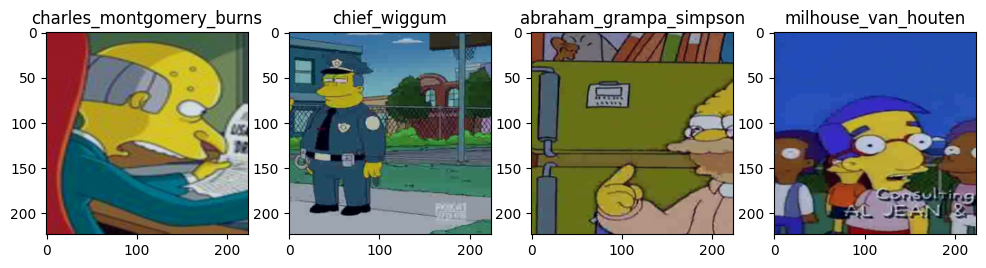

In [6]:

def image_shower(images, labels, phase, n=4):

    fig, axes = plt.subplots(1, 4)
    fig.set_figwidth(12)  # ширина и
    fig.set_figheight(6)
    for i, image in enumerate(images[:n]):
        image = image * 0.2 + 0.4
        axes[i].imshow(image.numpy().transpose((1, 2, 0)).squeeze())
        axes[i].set_title(classes_image[phase][labels[i]])

    plt.show()
    

images, labels = next(iter(loaders_image['train']))
image_shower( images, labels, 'train')

# Модель

In [10]:
model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(
    nn.Linear(2048, 128),
    nn.ReLU(inplace=True),
    nn.Linear(128, 42))
# model.fc = nn.Linear(512, 42)
model.to(device)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.fc.parameters())
optimizer = torch.optim.SGD(model.parameters(), lr =0.001, momentum = 0.9)  
    
mcf1s = F1Score(task="multiclass", num_classes=42)
print(torchinfo.summary(model, input_size = (100, 3, 64, 64)))

/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [100, 42]                 --
├─Conv2d: 1-1                            [100, 64, 32, 32]         (9,408)
├─BatchNorm2d: 1-2                       [100, 64, 32, 32]         (128)
├─ReLU: 1-3                              [100, 64, 32, 32]         --
├─MaxPool2d: 1-4                         [100, 64, 16, 16]         --
├─Sequential: 1-5                        [100, 256, 16, 16]        --
│    └─Bottleneck: 2-1                   [100, 256, 16, 16]        --
│    │    └─Conv2d: 3-1                  [100, 64, 16, 16]         (4,096)
│    │    └─BatchNorm2d: 3-2             [100, 64, 16, 16]         (128)
│    │    └─ReLU: 3-3                    [100, 64, 16, 16]         --
│    │    └─Conv2d: 3-4                  [100, 64, 16, 16]         (36,864)
│    │    └─BatchNorm2d: 3-5             [100, 64, 16, 16]         (128)
│    │    └─ReLU: 3-6                    [100, 64, 16, 16]  

/opt/homebrew/lib/python3.11/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/opt/homebrew/lib/python3.11/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


# Обучение

In [8]:
# def train_model(model, criterion, optimizer, num_epochs=3):
#     for epoch in range(num_epochs):
#         print('Epoch {}/{}'.format(epoch+1, num_epochs))
#         print('-' * 10)

#         for phase in ['train', 'validation']:
#             if phase == 'train':
#                 model.train()
#             else:
#                 model.eval()

#             running_loss = 0.0
#             running_corrects = 0

#             for inputs, labels in loaders_image[phase]:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)

#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels)

#                 if phase == 'train':
#                     optimizer.zero_grad()
#                     loss.backward()
#                     optimizer.step()

#                 _, preds = torch.max(outputs, 1)
#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds == labels.data)

#             epoch_loss = running_loss / len(data_image[phase])
#             epoch_acc = running_corrects.double() / len(data_image[phase])

#             print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
#                                                         epoch_loss,
#                                                         epoch_acc))
#     return model
# train_model(model, criterion, optimizer)

num_epochs = 10
train_losses = []
valid_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(loaders_image['train']):  
            
        images = images.to(device)
        labels = labels.to(device)
            
        outputs = model(images)
        loss = criterion(outputs, labels)
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        del images, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
                
    # Validation
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders_image['validation']:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs
        
        print('Accuracy of the network on the {} validation images: {:.4f} %'.format(5000, 100 * correct / total)) 


KeyboardInterrupt: 

# Точность

In [9]:
with torch.no_grad():

    correct = 0
    total = 0
    lab = []
    pred = []
    for i, (images, labels) in enumerate(loaders_image['test']):
        
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        for a, res in enumerate(predicted):
            if classes_image['train'][res] == classes_image['test'][labels[a]]:
                correct += 1
        lab = np.concatenate(labels, predicted)
        lab = np.concatenate(labels, predicted)

        if i%100==99:
            image_shower(images.cpu(), predicted.cpu(), 'train')

        del images, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()

    print('Accuracy of the network on the {} test images: {:.4f} %'.format(10000, 100 * correct / total))   
    print('F1 of the network on the {} test images: {:.4f} %'.format(10000, 100 * mcf1s(pred, lab)))   


KeyboardInterrupt: 